# Data Wrangling Project

In this report, my goal is to analyze the cleaned twitter data from the tweet archive of Twitter account WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a text comment about the dog. From Udacity, I got WeRateDogs Twitter archive's basic tweets data. To create interesting analyses and visualizations, I did additional gathering of data via twitter API and Image Predicitions File (provided by Udacity). Then I cleaned this data and stored it. I will load this stored clean data and analyze it in this report. 

# Analysis & Visualization
I will load the cleaned data and analyze it in following ways:
- Compare 'name' column for cleaned data vs original data
- Analyze Ratings for the cleaned data
- Study relationship between ratings and favorite_count for the cleaned data
- Study relationship between ratings and retweet_count for the cleaned data

In [1]:
import pandas as pd
import requests
import json
import numpy as np
%matplotlib inline

### 1. Compare 'name' column for cleaned data vs original data

#### Load Clean data


In [2]:
df_clean = pd.read_csv('twitter_archive_master.csv')
print("Finished loading and printing info:")
df_clean.info()

Finished loading and printing info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 31 columns):
Unnamed: 0                    2175 non-null int64
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 2117 non-null object
rating_numerator              2174 non-null float64
rating_denominator            2174 non-null float64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null objec

#### Analyze column 'name' for Cleaned data

In [3]:
# Number of None names (numerator)
None_counts = df_clean.name.value_counts()['None']
print("Number of 'None' names (numerator): {}".format(None_counts))

Number of 'None' names (numerator): 714


In [4]:
# Number of non-empty names (denominator)
non_empty_counts = df_clean.name.count()
print("Number of non-empty names (denominator): {}".format(non_empty_counts))

Number of non-empty names (denominator): 2175


In [5]:
# Percentage of None names i.e. no meaningful name
print("Percentage of None names i.e. no meaningful name: {}".format(None_counts / non_empty_counts))

Percentage of None names i.e. no meaningful name: 0.32827586206896553


Top 8 most common occuring names for cleaned data


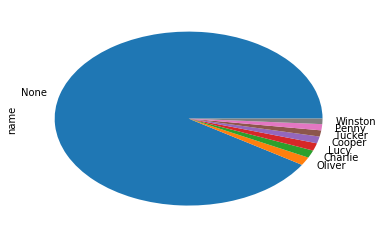

In [6]:
labels = np.full(len(df_clean.name.value_counts()), "", dtype=object)
print("Top 8 most common occuring names for cleaned data")
plot1 = df_clean.name.value_counts()[:8].plot(kind="pie")

#### Load Original data

Top 8 most common occuring names for original data


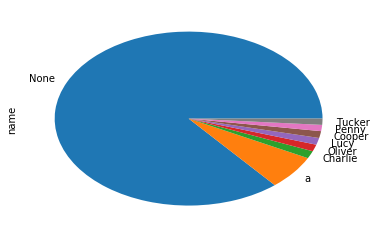

In [7]:
twitterarchiveenhanced = pd.read_csv('twitter-archive-enhanced.csv')
labels = np.full(len(twitterarchiveenhanced.name.value_counts()), "", dtype=object)
labels[0] = None
print("Top 8 most common occuring names for original data")
plot2 = twitterarchiveenhanced.name.value_counts()[:8].plot(kind="pie")

#### Conclusion: Cleaned data is able to remove irrelevant names such as 'a' and we can see more relevant names in top 8 most common names

### 2. Analyze Ratings for the cleaned data

In [8]:
df_clean['ratings'] = df_clean['rating_numerator'] / df_clean['rating_denominator']

In [9]:
print("Ratings values: ")
print(df_clean['ratings'].sort_values())

Ratings values: 
265       0.000000
840       0.000000
1761      0.100000
2080      0.100000
1912      0.100000
1690      0.100000
1267      0.100000
1859      0.100000
2157      0.100000
2058      0.200000
1582      0.200000
1585      0.200000
987       0.200000
1741      0.200000
2129      0.200000
2145      0.200000
2067      0.200000
2168      0.200000
1900      0.200000
1419      0.200000
2023      0.300000
1422      0.300000
2004      0.300000
618       0.300000
1657      0.300000
1768      0.300000
1070      0.300000
1749      0.300000
1759      0.300000
1957      0.300000
           ...    
70        1.400000
161       1.400000
160       1.400000
180       1.400000
105       1.400000
61        1.400000
183       1.400000
159       1.400000
352       1.400000
357       1.400000
98        1.400000
753       1.400000
313       1.400000
310       1.400000
875       1.400000
529       1.400000
53        1.400000
38        1.400000
247       1.500000
52        1.700000
1533      2.60

Histogram of ratings


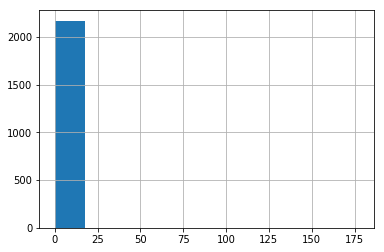

In [10]:
# Plot histogram of ratings
print("Histogram of ratings")
plot3 = df_clean['ratings'].hist()

In [11]:
diff_value = df_clean['ratings'].mean() - df_clean['ratings'].median()
print("Difference between mean and median ratings: {}".format(diff_value))

Difference between mean and median ratings: 0.12384228007503051


Histogram of ratings removing outliers


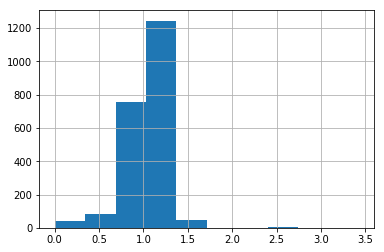

In [12]:
# Plot histogram of ratings removing outliers
print("Histogram of ratings removing outliers")
plot4 = df_clean['ratings'][df_clean['ratings'] < 7].hist()

In [13]:
diff_value = df_clean['ratings'][df_clean['ratings'] < 7].mean() - df_clean['ratings'][df_clean['ratings'] < 7].median()
print("Difference between mean and median ratings after removing outliers: {}".format(diff_value))

Difference between mean and median ratings after removing outliers: -0.036008709924761684


#### Conclusion: Outlier rating values larger than 7 (7 such values out of total 2175 ratings) make the ratings distribution skewed to the right. Without these outliers, ratings distribution is slightly left skewed.

### 3. Study relationship between ratings and favorite_count for the cleaned data

#### Scatterplots of Rating Against Favorite_Count

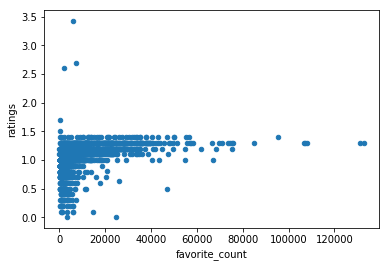

In [14]:
df_clean = df_clean[(df_clean['ratings'] < 7)]
plot5 = df_clean.plot(x = 'favorite_count', y = 'ratings', kind = 'scatter')

In [15]:
print("Correlation between ratings and favorite_count: {}".format(df_clean['ratings'].corr(df_clean['favorite_count'])))

Correlation between ratings and favorite_count: 0.3619254473141308


#### Conclusion: Ratings and Favorite count have a positive relationship: Higher favorite count generally has higher rating. This can also be seen in positive correlation value between ratings and favorite_count: 0.266


### 4. Study relationship between ratings and retweet_count for the cleaned data

#### Scatterplot of Ratings Against Retweet_Count

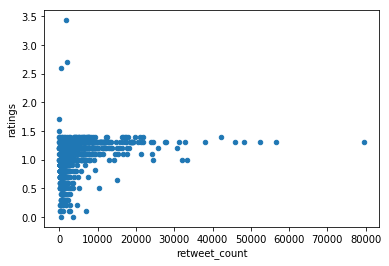

In [16]:
plot6 = df_clean.plot(x = 'retweet_count', y = 'ratings', kind = 'scatter')

In [17]:
print("Correlation between ratings and retweet_count: {}".format(df_clean['ratings'].corr(df_clean['retweet_count'])))

Correlation between ratings and retweet_count: 0.2732027815178464


#### Conclusion: Ratings and retweet count have a positive relationship: Higher tweet count generally has higher rating. This can also be seen in positive correlation value between ratings and retweet_count: 0.208

In [18]:
# jupyter nbconvert act_report.ipynb --TagRemovePreprocessor.remove_input_tags='{"remove_input_tags"}'
# Source: https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook

#### References:
- Udacity Project Overview
- https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook